 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [13]:
whale_returns = pd.read_csv(".\Resources\whale_returns.csv")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [14]:
# Reading whale returns
whale_returns = pd.read_csv(".\Resources\whale_returns.csv")
whale_returns.head(5)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [15]:
# Count nulls
whale_returns.info()
whale_returns.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1060 non-null   object 
 1   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 2   PAULSON & CO.INC.            1059 non-null   float64
 3   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 4   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4), object(1)
memory usage: 41.5+ KB


Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [16]:
# Drop nulls
whale_returns = whale_returns.dropna()

In [17]:
whale_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [18]:
ls Resources

 Volume in drive C is Windows
 Volume Serial Number is F0A9-DAD2

 Directory of C:\Users\Harrison\FinTech\RUT-VIRT-FIN-PT-05-2021-U-LOL\02-Homework\04-Pandas\Starter_Code\Resources

06/22/2021  04:05 PM    <DIR>          .
06/22/2021  04:05 PM    <DIR>          ..
06/22/2021  04:05 PM    <DIR>          .ipynb_checkpoints
06/04/2021  08:11 PM             9,520 aapl_historical.csv
06/04/2021  08:11 PM            67,707 algo_returns.csv
06/04/2021  08:11 PM             9,520 cost_historical.csv
06/04/2021  08:11 PM             9,768 goog_historical.csv
06/04/2021  08:11 PM            30,856 sp500_history.csv
06/04/2021  08:11 PM           100,960 whale_returns.csv
               6 File(s)        228,331 bytes
               3 Dir(s)  401,179,373,568 bytes free


In [19]:
pwd

'C:\\Users\\Harrison\\FinTech\\RUT-VIRT-FIN-PT-05-2021-U-LOL\\02-Homework\\04-Pandas\\Starter_Code'

In [20]:
# Reading algorithmic returns
algo_returns = pd.read_csv(".\Resources\\algo_returns.csv")
algo_returns.head(5)

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [21]:
# Count nulls
algo_returns.isna().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [22]:
# Drop nulls
algo_returns = algo_returns.dropna()

In [23]:
algo_returns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 6 to 1240
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1235 non-null   object 
 1   Algo 1  1235 non-null   float64
 2   Algo 2  1235 non-null   float64
dtypes: float64(2), object(1)
memory usage: 38.6+ KB


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [24]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv(".\Resources\\sp500_history.csv")
sp500_history.head(5)

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [25]:
# Check Data Types
sp500_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1649 non-null   object
 1   Close   1649 non-null   object
dtypes: object(2)
memory usage: 25.9+ KB


In [26]:
# Fix Data Types
# We want to turn the Date colum into a datetime object, rather than a string 
# We want to turn the Close colum into a float (removing the $), rather a string
 
date = list(sp500_history['Date'])
close = list (sp500_history["Close"])

date = [dt.datetime.strptime(date_str, "%d-%b-%y") for date_str in date]
close = [float(x.replace('$',"")) for x in close]
sp500_history['Close'] = close        
sp500_history['Date'] = date

In [27]:
sp500_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1649 non-null   datetime64[ns]
 1   Close   1649 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.9 KB


In [28]:
whale_returns['Date'] = [dt.datetime.strptime(date_str, '%Y-%m-%d') for date_str in list(whale_returns['Date'])]
algo_returns['Date'] = [dt.datetime.strptime(date_str, '%Y-%m-%d') for date_str in list(algo_returns['Date'])]

In [29]:
whale_returns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 1 to 1059
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1059 non-null   datetime64[ns]
 1   SOROS FUND MANAGEMENT LLC    1059 non-null   float64       
 2   PAULSON & CO.INC.            1059 non-null   float64       
 3   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64       
 4   BERKSHIRE HATHAWAY INC       1059 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 49.6 KB


In [30]:
algo_returns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 6 to 1240
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1235 non-null   datetime64[ns]
 1   Algo 1  1235 non-null   float64       
 2   Algo 2  1235 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.6 KB


In [31]:
# Calculate Daily Returns
# Get all the day information in order by sorting by the Date column
sp500_history = sp500_history.sort_values('Date', ignore_index = True)

close = list(sp500_history['Close']) # Extracts all the close column information into a list

# Here close[i] represents the closing price of the current day
# close[i + 1] represents the closing price of the next day/the opening price of the current day

# Calculates all the returns
returns = [(close[i] - close[i + 1])/ close[i + 1] for i in range(len(close) - 1)]

In [32]:
sp500_history ['Close'] = returns + [None]# To make the lsit the correct size

In [33]:
# Drop nulls
sp500_history = sp500_history.dropna() # Drop the last undefined value

In [34]:
sp500_history = sp500_history.rename(columns = {'Close': 'S&P 500'})

In [35]:
sp500_history # Length should be one less than the pervious Close column

,Date,S&P 500
0,2012-10-01,-0.000872
1,2012-10-02,-0.003611
2,2012-10-03,-0.007123
3,2012-10-04,0.000322
4,2012-10-05,0.003469
...,...,...
1643,2019-04-15,-0.000509
1644,2019-04-16,0.002279
1645,2019-04-17,-0.001577
1646,2019-04-18,-0.001011


## Combine Whale, Algorithmic, and S&P 500 Returns

In [36]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df = whale_returns.merge(algo_returns, how="left", on="Date").dropna()
df = df.merge(sp500_history, how="left",on='Date').dropna()   

In [37]:
df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...,...
1037,2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
1038,2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
1039,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
1040,2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [38]:
import matplotlib.pyplot as plt

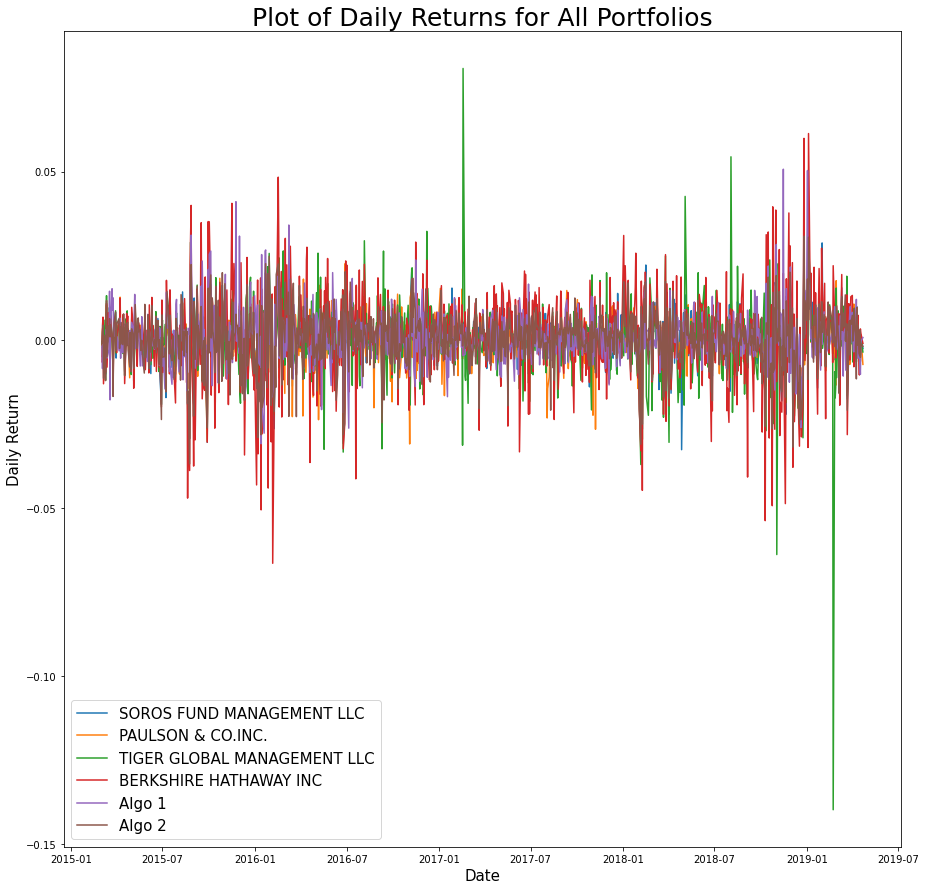

In [39]:
# Plot daily returns of all portfolios
plt.figure(figsize=(15, 15))
portfolios = list(df.columns)
portfolios.remove('Date')
portfolios.remove('S&P 500')

for portfolio in portfolios:
    plt.plot(list(df['Date']), list(df[portfolio]))


plt.title('Plot of Daily Returns for All Portfolios', fontsize=25)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Return', fontsize=15)
plt.legend(portfolios, loc="lower left", fontsize=15)

#### Calculate and Plot cumulative returns.

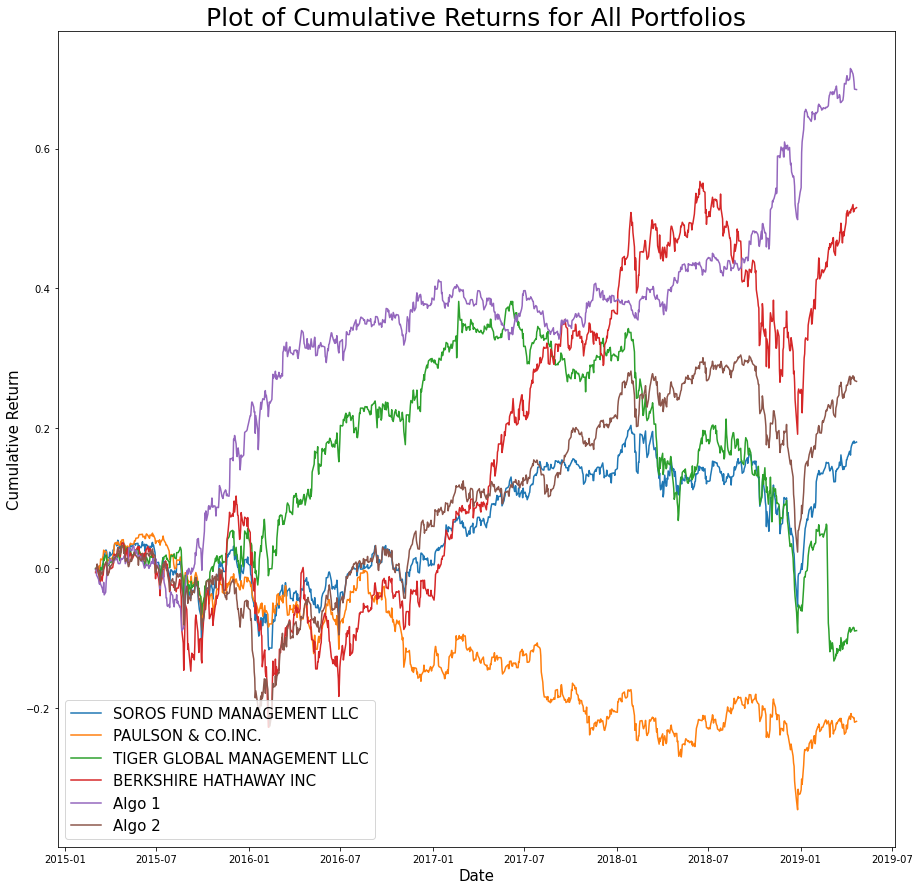

In [40]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
plt.figure(figsize=(15, 15))




for portfolio in portfolios: # Go through each portfolio

    p_returns = df[portfolio] # Extract daily returns information of the specified portfolio

    cumulative_returns = [] # Cumulative returns -- to be calculated

    

    # Example: d_r = [1,2,3,4,5,6]

    # Example: c_r = [1,3,6,10,15,21]

    # For all returns

    for i in range(len(p_returns)): # i represents the number of elements I need to sum

        if i == 0: # If we're on the first day, the cumulative return is simply the daily return of the first day

            cumulative_returns.append(p_returns[i])

        else: # Else, sum up all daily returns from 0 up till the current day as today's cumulative return

            cumulative_returns.append(sum(p_returns[0:i]))




    plt.plot(list(df['Date']), cumulative_returns) # Plot the result







plt.title('Plot of Cumulative Returns for All Portfolios', fontsize=25)

plt.xlabel('Date', fontsize=15)

plt.ylabel('Cumulative Return', fontsize=15)

plt.legend(portfolios, loc="lower left", fontsize=15)


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


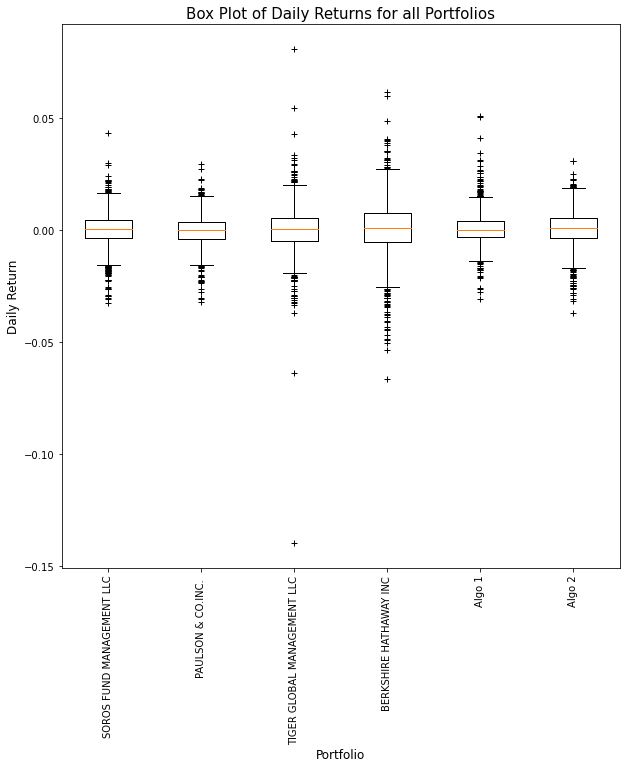

In [41]:
# Box plot to visually show risk
plt.figure(figsize=(10, 10))
bp = plt.boxplot(df[portfolios], notch=0, sym='+', vert=1, whis=1.5)
plt.title('Box Plot of Daily Returns for all Portfolios', fontsize = 15)
plt.xticks(range(1, len(portfolios) + 1), portfolios, rotation='vertical')
plt.xlabel('Portfolio', fontsize = 12)
plt.ylabel('Daily Return', fontsize = 12)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')
plt.show()

### Calculate Standard Deviations

In [42]:
dates = list(df['Date'])
years = set([x.year for x in list(df['Date'])])
years # Unique years


{2015, 2016, 2017, 2018, 2019}

In [43]:
year = list(pd.DatetimeIndex(df['Date']).year) # Extract the year from each Date datetime object in df
df2 = df
df2['Year'] = year


list_of_stdvs = [] # This is a list that will store the S&P 500 standard deviation for *each* unique year


for unique_year in years: # For each year
    df_year = df2[df2['Year'] == unique_year] # Extract the dataframe information associated with that year
    # Extract the S&P 500 returns, and take the standard deviation and add that to my list
    list_of_stdvs.append(np.std(df_year['S&P 500'])) 


list_of_stdvs

[0.008210385352433403,
 0.004204184336087975,
 0.010770338831434613,
 0.00779602536721388,
 0.009990360407215884]

In [44]:
# Calculate the daily standard deviations of all portfolios
SP500_annualized_standard_deviation = np.mean(list_of_stdvs)
print("The annualized standard deviation is:", SP500_annualized_standard_deviation)

The annualized standard deviation is: 0.008194258858877151


### Determine which portfolios are riskier than the S&P 500

In [45]:
# Calculate the daily standard deviations of all portfolios
standard_deviations = {} # Dictionary to store each portfolio and its associated standard deviation


for portfolio in portfolios: # Go through each of the portfolios
    # Extract its daily return information and get the standard deviation of that column, then store in 
    # the dictionary
    standard_deviations[portfolio] = np.std(df[portfolio])


standard_deviations

{'SOROS FUND MANAGEMENT LLC': 0.007892398877625705,
 'PAULSON & CO.INC. ': 0.0070221434497644945,
 'TIGER GLOBAL MANAGEMENT LLC': 0.01089207512610612,
 'BERKSHIRE HATHAWAY INC': 0.012912552556415196,
 'Algo 1': 0.007619032255688895,
 'Algo 2': 0.008337230995337319}

In [46]:
# Calculate  the daily standard deviation of S&P 500
SP500_std = np.std(df['S&P 500'])
# Determine which portfolios are riskier than the S&P 500
print("Daily standard deviation of the S&P 500:", SP500_std)


for portfolio in portfolios: # Go through each portfolio
    if standard_deviations[portfolio] > SP500_std: # Compare the portfolio's standard deviation to the S&P 500
        print(portfolio + " is riskier than the S&P 500") # If it is larger, it is riskier

Daily standard deviation of the S&P 500: 0.008582768369468172
TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
BERKSHIRE HATHAWAY INC is riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized standard deviation (252 trading days)
standard_deviations = {} # Dictionary to store each portfolio and its associated standard deviation


for portfolio in portfolios: # Go through each of the portfolios
    # Extract its daily return information and get the standard deviation of that column, then store in 
    # the dictionary
    standard_deviations[portfolio] = np.std(df[portfolio])


standard_deviations

{'SOROS FUND MANAGEMENT LLC': 0.007892398877625705,
 'PAULSON & CO.INC. ': 0.0070221434497644945,
 'TIGER GLOBAL MANAGEMENT LLC': 0.01089207512610612,
 'BERKSHIRE HATHAWAY INC': 0.012912552556415196,
 'Algo 1': 0.007619032255688895,
 'Algo 2': 0.008337230995337319}

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

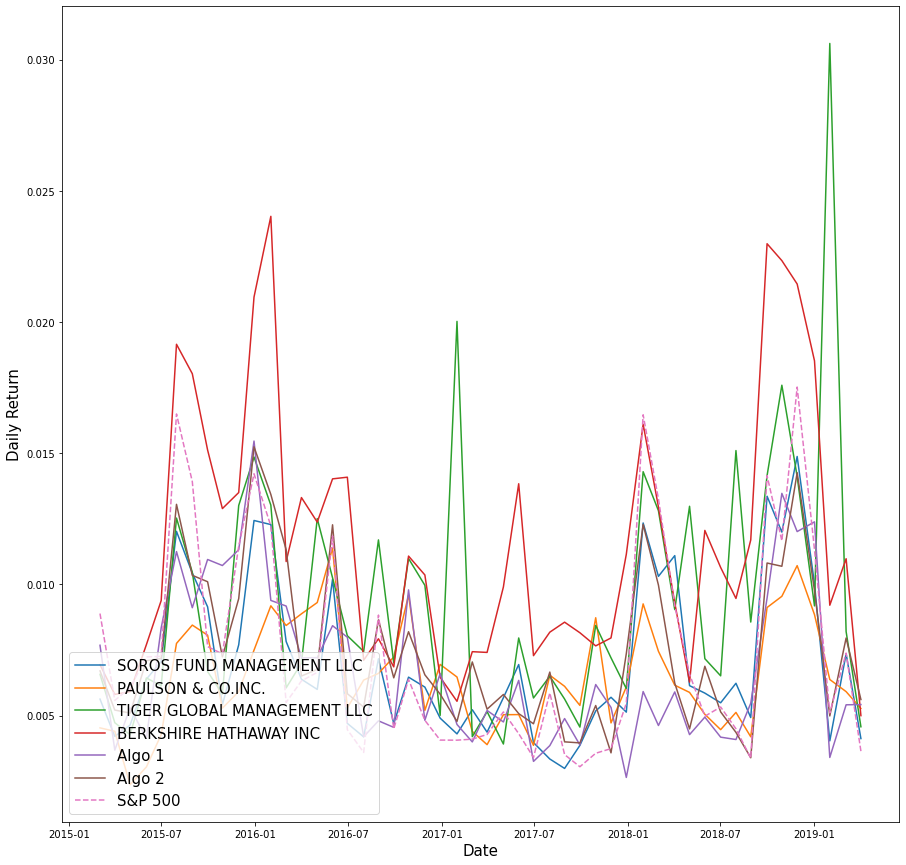

In [48]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window




# Plot the rolling standard deviation
plt.figure(figsize=(15, 15))
portfolios = list(df.columns) # List of the different portfolios/columns we want to plot


# Gets rid of the non-portfolio column names
portfolios.remove('Date')
portfolios.remove('Year')
# portfolios.remove('S&P 500')


# Example: [1,2,3,4,5,6,7,8,9,10] --> length of 10
# Sliding window size = 3
# Windows: [1,2,3], [2,3,4], [3,4,5], [4,5,6], [5,6,7], [7,8,9], [8,9,10] --> 7 windows
# Take the stdev of each window --> 7 standard deviations


dates = list(df['Date'])


for portfolio in portfolios: # For each of our portfolios
    p_returns = list(df[portfolio]) # Extract daily returns information of the specified portfolio


    l = []
    sliding_dates = []
    
    # If we have sliding windows of size m, and our list is of size n, we can make (n - m) + 1 windows
    for i in range(0, len(p_returns), 21):
        window = p_returns[i: i + 21] # Obtain the sliding window information
        window_std = np.std(window) # Obtain the standard deviation of the sliding window 
        l.append(window_std)
        sliding_dates.append(dates[i]) # Save only the dates associated with the beginning of our sliding windows
    
    line = '-'
    if portfolio != 'S&P 500':
        line = '-'
    else:
        line="--"


    plt.plot(sliding_dates, l, alpha = 1, linestyle = line) # Plot the daily returns of each portfolio vs. the date




#plt.title('Plot of Daily Returns for All Portfolios', fontsize=25)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Return', fontsize=15)
plt.legend(portfolios, loc="lower left", fontsize=15)


### Calculate and plot the correlation

In [49]:
import seaborn as sns
# Calculate the correlation


# Display de correlation matrix


sns.set_theme(style="white")


# Generate a large random dataset
rs = np.random.RandomState(33)
d = df.drop(columns = ['Date', 'Year']) # Drop date and year
# Compute the correlation matrix
corr = d.corr()


corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

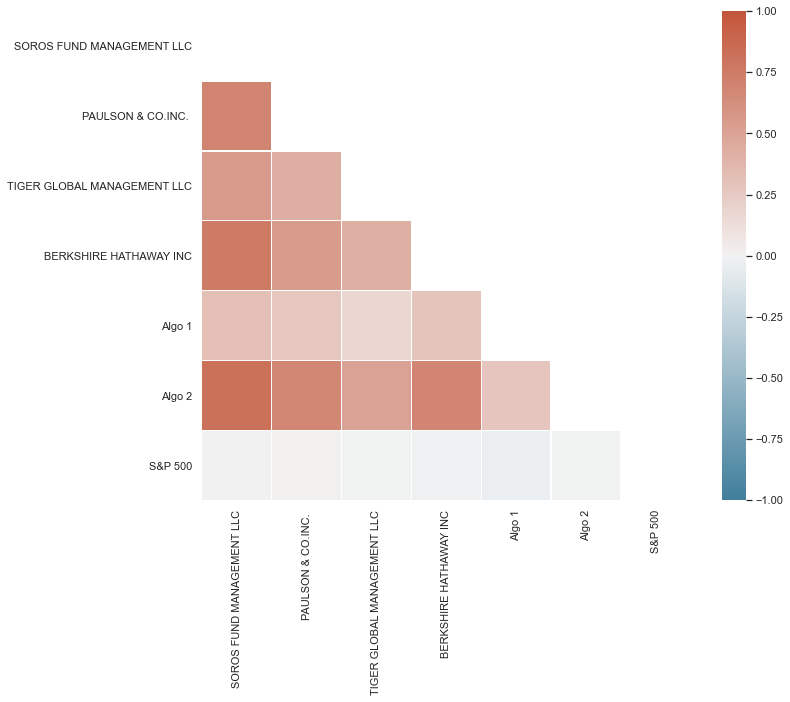

In [50]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

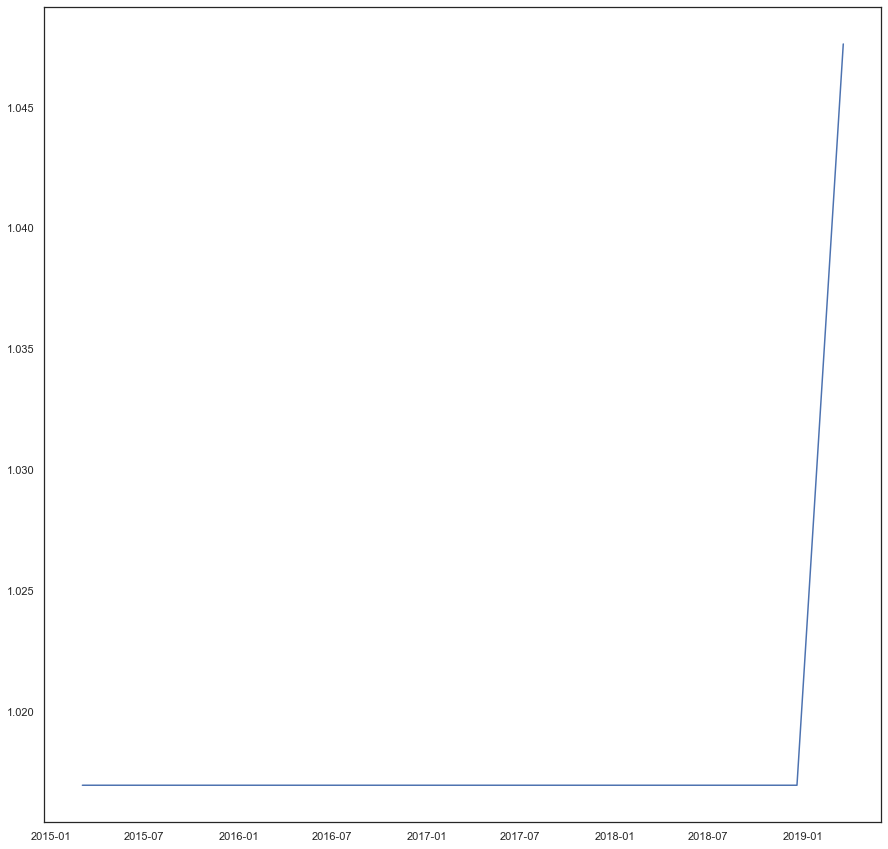

In [51]:
# Calculate covariance of a single portfolio


# Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500


SP500_returns = list(df['S&P 500'])
sliding_betas = []
sliding_dates = []


for i in range(0, len(SP500_returns), 60):
    window = SP500_returns[i: i + 60] # Obtain the sliding window information
    window_cov = np.cov(window) # Obtain the covariance of the sliding window 
    window_var = np.var(window) # Obtain the variance of the sliding window 
    sliding_betas.append(window_cov / window_var)
    sliding_dates.append(dates[i]) # Save only the dates associated with the beginning of our sliding windows




# Plot beta trend
plt.figure(figsize = (15,15))
plt.plot(sliding_dates, sliding_betas)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [52]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Annualized Sharpe Ratios
d_sharpe = {} # Dictionary to store all my portfolio names and their sharpe rations for each year (2015-2019)


portfolios = list(df.columns) # Get my list of column names and remove my non-portfolios
portfolios.remove('Year')
portfolios.remove('Date')
portfolios.remove('S&P 500')


for portfolio in portfolios: # Loop through each portfolio
    
    sharpe_ratios = [] # Define an empty list for the portfolio that will store all its sharpe ratios across all years
    
    for unique_year in years: # For each year
        df_year = df2[df2['Year'] == unique_year] # Extract the dataframe information associated with that year
        
        df_portfolio = df_year[portfolio] # Extract the information for my portfolio of interest
        df_SP500 = df_year['S&P 500'] # Extract the information for the S&P 500 (risk-free portfolio)
        
        # Calculate the sharpe ratio for this portfolio and year
        sharpe = (np.mean(df_portfolio) - np.mean(df_SP500)) / np.std(df_portfolio)
        
        # Add the sharpe ratio to the list of sharpe ratios
        sharpe_ratios.append(sharpe)
    
    # Once all years-worth of sharpe ratios have been calculated for this portfolio, we put all the info in the dictionary
    d_sharpe[portfolio] = sharpe_ratios


d_sharpe

{'SOROS FUND MANAGEMENT LLC': [0.05348921293395143,
  0.2525665012882502,
  -0.09140137854274304,
  0.5877698990856307,
  -0.031708420428324974],
 'PAULSON & CO.INC. ': [-0.0056988216990818685,
  0.07206390837805866,
  -0.1050242455521344,
  0.4526000464615985,
  -0.06105843087556611],
 'TIGER GLOBAL MANAGEMENT LLC': [0.14109169968704882,
  0.08810684455144059,
  -0.14341180243540252,
  0.08794801391634553,
  -0.012282746321849902],
 'BERKSHIRE HATHAWAY INC': [0.002760849145638213,
  0.2723401018807806,
  -0.050658589822567816,
  0.4256082502192461,
  -0.0022000341668748855],
 'Algo 1': [0.12914649397670547,
  0.13397567723321016,
  0.039479170732624976,
  0.4861385452981789,
  0.08558441410975441],
 'Algo 2': [0.09286001208942676,
  0.24207429428649233,
  -0.10053270441226057,
  0.587801342658908,
  -0.06385525387225796]}

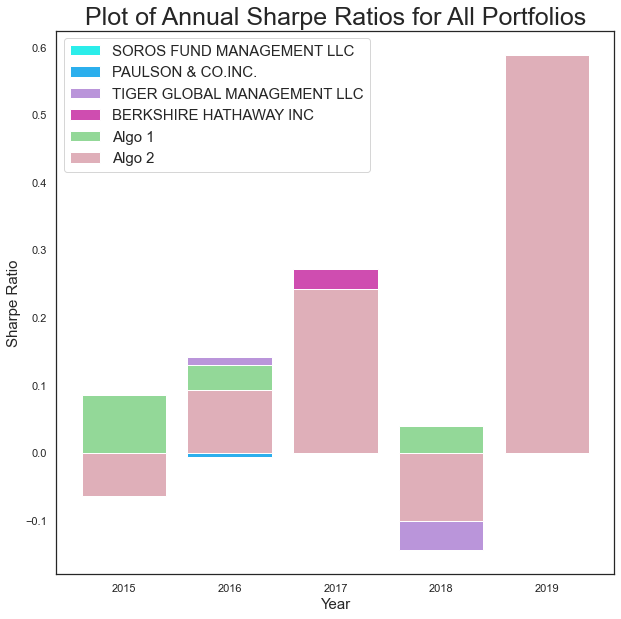

In [54]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 10))
colours = ['#2BEDEA', '#2BAFED', '#BA95DA', '#CF4DB0', '#93D898', '#DFAFB9']
c = 0
for portfolio in d_sharpe:
    #plt.title('Bar Plot of Storm Types in Month of ' + month_d[i])
    plt.bar(list(years), d_sharpe[portfolio], color = colours[c])
    c += 1


plt.title('Plot of Annual Sharpe Ratios for All Portfolios', fontsize=25)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Sharpe Ratio', fontsize=15)
plt.legend(portfolios, loc="upper left", fontsize=15)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.



Lower standard deviation, which means lower risk, would result in a higher sharpe ratio, based on the equation (as we have sigma_a in the demoninator). This means risk/standard deviation has a negatively proportioned to our sharpe ratio --> larger sharpe ratio is better! According to the above bar plot, Algo 1 and Algo 2 had generally high sharpe ratios. This means that these algorithms maximize daily return while also minimizing risk or standard deviation. As such, I think we cna conclude that the algorithmic stategies did outperform both the market (S&P 500) and the whales portfolios. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [55]:
# Reading data from 1st stock
goog_historical = pd.read_csv(".\Resources\\goog_historical.csv")

In [56]:
goog_historical.head(5)

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [57]:
# Reading data from 2nd stock
aapl_historical = pd.read_csv(".\Resources\\aapl_historical.csv")

In [58]:
aapl_historical.head(5)

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [59]:
# Reading data from 3rd stock
cost_historical = pd.read_csv(".\Resources\\cost_historical.csv")

In [60]:
cost_historical.head(5)

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [61]:
# Reorganize portfolio data by having a column per symbol
goog_historical2 = goog_historical.rename(columns = {'NOCP': 'GOOG'}).drop(columns = 'Symbol')
aapl_historical2 = aapl_historical.rename(columns = {'NOCP': 'AAPL'}).drop(columns = 'Symbol')
cost_historical2 = cost_historical.rename(columns = {'NOCP': 'COST'}).drop(columns = 'Symbol')


# Combine all stocks in a single DataFrame
df_stocks = goog_historical2.merge(aapl_historical2, how="left", on="Trade DATE").dropna()
df_stocks = df_stocks.merge(cost_historical2, how="left", on="Trade DATE").dropna()
df_stocks.head(5)


,Trade DATE,GOOG,AAPL,COST
0,5/9/2019,1162.38,200.72,243.47
1,5/8/2019,1166.27,202.90,241.34
2,5/7/2019,1174.10,202.86,240.18
3,5/6/2019,1189.39,208.48,244.23
4,5/3/2019,1185.40,211.75,244.62


In [62]:
# Reset Date index
df_stocks.reset_index(inplace = True) 

In [63]:
# Reorganize portfolio data by having a column per symbol


In [64]:
# Calculate daily returns
df_stocks['Trade DATE'] = [dt.datetime.strptime(date_str, '%m/%d/%Y') for date_str in list(df_stocks['Trade DATE'])]


# Calculate Daily Returns


# Get all the day information in order by sorting by the Date column
df_stocks = df_stocks.sort_values('Trade DATE', ignore_index = True)


goog = list(df_stocks['GOOG'])
aapl = list(df_stocks['AAPL'])
cost = list(df_stocks['COST'])




returns_goog = [(goog[i] - goog[i + 1])/ goog[i + 1] for i in range(len(goog) - 1)] + [None]
returns_aapl = [(aapl[i] - aapl[i + 1])/ aapl[i + 1] for i in range(len(aapl) - 1)] + [None]
returns_cost = [(cost[i] - cost[i + 1])/ cost[i + 1] for i in range(len(cost) - 1)] + [None]


df_stocks['GOOG'] = returns_goog
df_stocks['AAPL'] = returns_aapl
df_stocks['COST'] = returns_cost


# Drop NAs
df_stocks = df_stocks.dropna()


# Display sample data
df_stocks


,index,Trade DATE,GOOG,AAPL,COST
0,249,2018-05-11,-0.001763,0.002339,-0.000613
1,248,2018-05-14,0.019431,0.009172,0.002046
2,247,2018-05-15,-0.002348,-0.009246,-0.016255
3,246,2018-05-16,0.002948,0.006364,-0.004459
4,245,2018-05-17,0.011469,0.003650,0.003217
...,...,...,...,...,...
244,5,2019-05-02,-0.019226,-0.012279,-0.007890
245,4,2019-05-03,-0.003355,0.015685,0.001597
246,3,2019-05-06,0.013023,0.027704,0.016862
247,2,2019-05-07,0.006714,-0.000197,-0.004806


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

Text(0, 0.5, 'Weighted Daily Return')

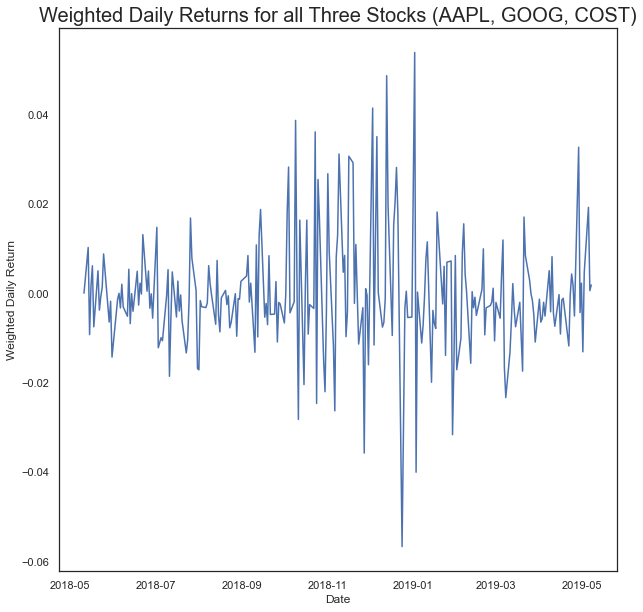

In [65]:
# Set weights
weights = [1/3, 1/3, 1/3]


# Calculate portfolio return
weighted_returns = [ (1/3) * sum([returns_goog[i], returns_aapl[i], returns_cost[i]]) for i in range(len(returns_goog ) - 1)]


df_stocks['Weighted Returns'] = weighted_returns
# Display sample data


plt.figure(figsize=(10,10))
plt.title('Weighted Daily Returns for all Three Stocks (AAPL, GOOG, COST)', fontsize=20)
plt.plot(list(df_stocks['Trade DATE']), weighted_returns)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weighted Daily Return', fontsize=12)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [66]:
# Join your returns DataFrame to the original returns DataFrame
df_stocks = df_stocks.rename(columns = {'Trade DATE': 'Date'})
df = df.merge(df_stocks, how="left", on="Date").dropna()

In [67]:
df.head(5)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Year,index,GOOG,AAPL,COST,Weighted Returns
805,2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,2018,249.0,-0.001763,0.002339,-0.000613,-0.000012
806,2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,2018,248.0,0.019431,0.009172,0.002046,0.010216
807,2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,2018,247.0,-0.002348,-0.009246,-0.016255,-0.009283
808,2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,2018,246.0,0.002948,0.006364,-0.004459,0.001618
809,2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,2018,245.0,0.011469,0.003650,0.003217,0.006112


In [68]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df = df.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [69]:
# Calculate the annualized `std`
year = list(pd.DatetimeIndex(df['Date']).year) # Extract the year from each Date datetime object in df
unique_years = set(year)
df['Year'] = year
portfolios = list(df.drop(columns = ['Year', 'Date', 'Weighted Returns']).columns)


d_portfolios = {}


for portfolio in portfolios:
    list_of_stdvs = [] # Each portfolio will have its own list of annualized standard deviations


    for unique_year in unique_years: # For each year
        df_year = df[df['Year'] == unique_year] # Extract the dataframe information associated with that year
        
        list_of_stdvs.append(np.std(df_year[portfolio])) 
    
    d_portfolios[portfolio] = list_of_stdvs


d_portfolios

{'SOROS FUND MANAGEMENT LLC': [0.00979173442546583, 0.0074131682598363845],
 'PAULSON & CO.INC. ': [0.007388533307443006, 0.007098938561155289],
 'TIGER GLOBAL MANAGEMENT LLC': [0.01259182511445201, 0.018149417223142415],
 'BERKSHIRE HATHAWAY INC': [0.01643128351249113, 0.012747017688246556],
 'Algo 1': [0.008570329597467959, 0.007972512256883644],
 'Algo 2': [0.008929495161006046, 0.0077689495516295014],
 'S&P 500': [0.010188856733718606, 0.00779602536721388],
 'index': [46.475800154489, 21.937410968480304],
 'GOOG': [0.017052163090449896, 0.013492599907765314],
 'AAPL': [0.018587428149037882, 0.01920225547465843],
 'COST': [0.014844648509707343, 0.01028983480229743]}

### Calculate and plot rolling `std` with 21-day window

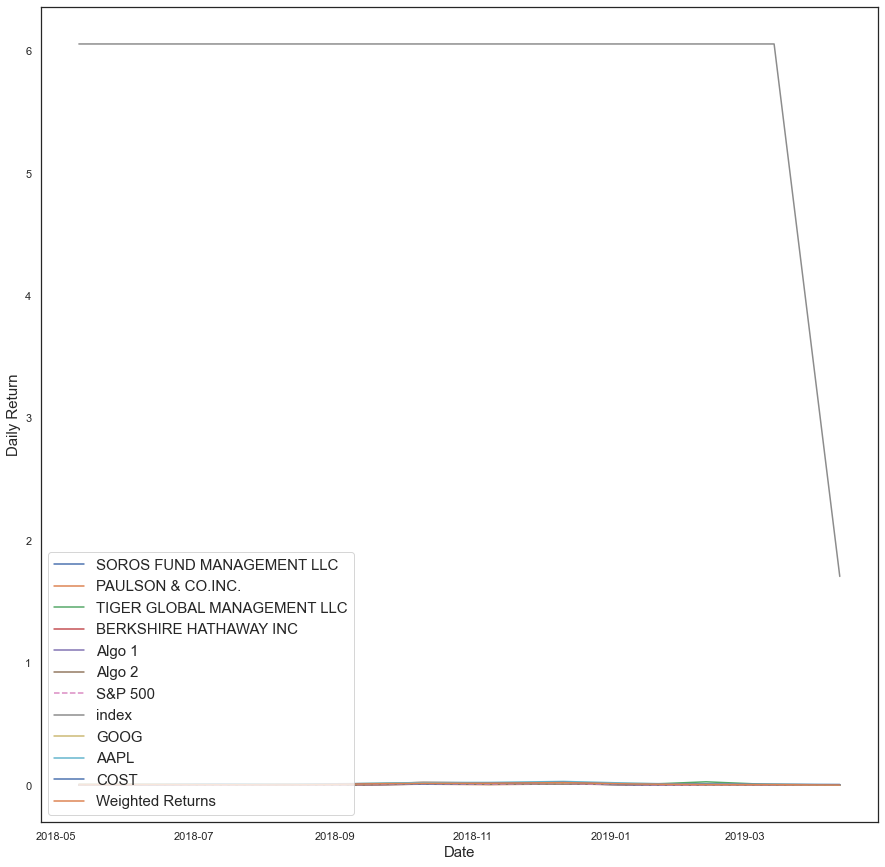

In [77]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window




# Plot the rolling standard deviation
plt.figure(figsize=(15, 15))
portfolios = list(df.columns) # List of the different portfolios/columns we want to plot


# Gets rid of the non-portfolio column names
portfolios.remove('Date')
portfolios.remove('Year')
# portfolios.remove('S&P 500')


# Example: [1,2,3,4,5,6,7,8,9,10] --> length of 10
# Sliding window size = 3
# Windows: [1,2,3], [2,3,4], [3,4,5], [4,5,6], [5,6,7], [7,8,9], [8,9,10] --> 7 windows
# Take the stdev of each window --> 7 standard deviations


dates = list(df['Date'])


for portfolio in portfolios: # For each of our portfolios
    p_returns = list(df[portfolio]) # Extract daily returns information of the specified portfolio


    l = []
    sliding_dates = []
    
    # If we have sliding windows of size m, and our list is of size n, we can make (n - m) + 1 windows
    for i in range(0, len(p_returns), 21):
        window = p_returns[i: i + 21] # Obtain the sliding window information
        window_std = np.std(window) # Obtain the standard deviation of the sliding window 
        l.append(window_std)
        sliding_dates.append(dates[i]) # Save only the dates associated with the beginning of our sliding windows
    
    line = '-'
    if portfolio != 'S&P 500':
        line = '-'
    else:
        line="--"


    plt.plot(sliding_dates, l, alpha = 1, linestyle = line) # Plot the daily returns of each portfolio vs. the date




#plt.title('Plot of Daily Returns for All Portfolios', fontsize=25)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Return', fontsize=15)
plt.legend(portfolios, loc="lower left", fontsize=15);


### Calculate and plot the correlation

In [71]:
# Calculate and plot the correlation
wdf = pd.read_csv('Resources/whale_returns.csv')
wdf.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [1]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio


# Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500


SP500_returns = list(df['S&P 500'])
sliding_betas = []
sliding_dates = []


for i in range(0, len(SP500_returns), 60):
    window = SP500_returns[i: i + 60] # Obtain the sliding window information
    window_cov = np.cov(window) # Obtain the covariance of the sliding window 
    window_var = np.var(window) # Obtain the variance of the sliding window 
    sliding_betas.append(window_cov / window_var)
    sliding_dates.append(dates[i]) # Save only the dates associated with the beginning of our sliding windows




# Plot beta trend
plt.figure(figsize = (15,15))
plt.plot(sliding_dates, sliding_betas)

NameError: name 'df' is not defined

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [2]:
# Calculate Annualzied Sharpe Ratios
# Annualized Sharpe Ratios
d_sharpe = {} # Dictionary to store all my portfolio names and their sharpe rations for each year (2015-2019)


portfolios = list(df.columns) # Get my list of column names and remove my non-portfolios
portfolios.remove('Year')
portfolios.remove('Date')
portfolios.remove('S&P 500')


for portfolio in portfolios: # Loop through each portfolio
    
    sharpe_ratios = [] # Define an empty list for the portfolio that will store all its sharpe ratios across all years
    
    for unique_year in years: # For each year
        df_year = df2[df2['Year'] == unique_year] # Extract the dataframe information associated with that year
        
        df_portfolio = df_year[portfolio] # Extract the information for my portfolio of interest
        df_SP500 = df_year['S&P 500'] # Extract the information for the S&P 500 (risk-free portfolio)
        
        # Calculate the sharpe ratio for this portfolio and year
        sharpe = (np.mean(df_portfolio) - np.mean(df_SP500)) / np.std(df_portfolio)
        
        # Add the sharpe ratio to the list of sharpe ratios
        sharpe_ratios.append(sharpe)
    
    # Once all years-worth of sharpe ratios have been calculated for this portfolio, we put all the info in the dictionary
    d_sharpe[portfolio] = sharpe_ratios


d_sharpe

NameError: name 'df' is not defined

In [3]:
# Visualize the sharpe ratios as a bar plot
# Annualized Sharpe Ratios
d_sharpe = {} # Dictionary to store all my portfolio names and their sharpe rations for each year (2015-2019)


portfolios = list(df.columns) # Get my list of column names and remove my non-portfolios
portfolios.remove('Year')
portfolios.remove('Date')
portfolios.remove('S&P 500')


for portfolio in portfolios: # Loop through each portfolio
    
    sharpe_ratios = [] # Define an empty list for the portfolio that will store all its sharpe ratios across all years
    
    for unique_year in years: # For each year
        df_year = df2[df2['Year'] == unique_year] # Extract the dataframe information associated with that year
        
        df_portfolio = df_year[portfolio] # Extract the information for my portfolio of interest
        df_SP500 = df_year['S&P 500'] # Extract the information for the S&P 500 (risk-free portfolio)
        
        # Calculate the sharpe ratio for this portfolio and year
        sharpe = (np.mean(df_portfolio) - np.mean(df_SP500)) / np.std(df_portfolio)
        
        # Add the sharpe ratio to the list of sharpe ratios
        sharpe_ratios.append(sharpe)
    
    # Once all years-worth of sharpe ratios have been calculated for this portfolio, we put all the info in the dictionary
    d_sharpe[portfolio] = sharpe_ratios


d_sharpe

NameError: name 'df' is not defined

### How does your portfolio do?

Write your answer here!